In [5]:
import numpy as np
import torch
import matplotlib.pyplot as plt
import torch.nn as nn

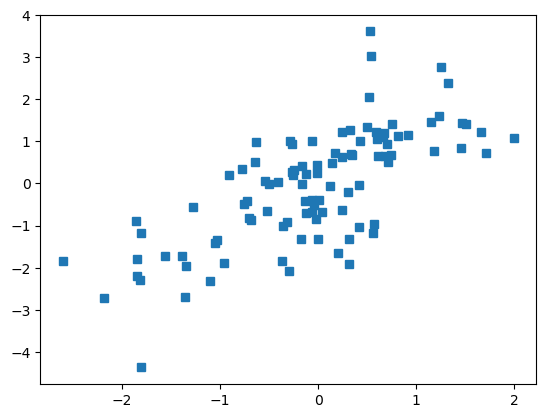

In [4]:
N = 100
x = torch.randn(N, 1)
y = x + torch.randn(N,1)

plt.plot(x, y, 's')
plt.show()

In [6]:
ANNreg = nn.Sequential(
    nn.Linear(1,1),
    nn.ReLU(),
    nn.Linear(1,1)
)

lossFunction = nn.MSELoss()

optimizer = torch.optim.SGD(params=ANNreg.parameters(), lr=0.01)

## Select Training Data

In [18]:
trainIdx = np.random.choice(range(N), int(0.8*N), replace=False)
trainBool = np.zeros(N, dtype=bool)
trainBool[trainIdx] = True

print(x[trainBool].shape)
print(x[~trainBool].shape)

torch.Size([80, 1])
torch.Size([20, 1])


In [13]:
epochs = 500

for epoch in range(epochs):
    yHat = ANNreg(x[trainBool])

    loss = lossFunction(yHat, y[trainBool])

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

In [15]:
predTestLabels = ANNreg(x[~trainBool])
testLoss = (predTestLabels-y[~trainBool]).pow(2).mean()

print(f'Final training loss: {loss.detach():.2f}')
print(f'Final test loss: {testLoss.detach():.2f}')


Final training loss: 0.93
Final test loss: 1.58


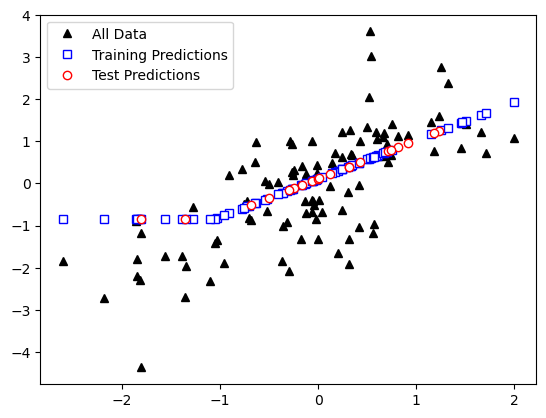

In [16]:
predTrainLabels = ANNreg(x[trainBool]).detach().numpy()

plt.plot(x,y, 'k^', label='All Data')
plt.plot(x[trainBool], predTrainLabels, 'bs', markerfacecolor='w', label='Training Predictions')
plt.plot(x[~trainBool], predTestLabels.detach(), 'ro', markerfacecolor='w', label='Test Predictions')
plt.legend()
plt.show()
